In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/cleaned.csv")
df.head(1)

,scoutId,regio1,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,cellar,condition,interiorQual,petsAllowed,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,has_refurbished,floor_division,meter_price
0,96107057,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,1.0,oil,False,True,well_kept,normal,negotiable,Schüruferstraße,False,4,ground_floor,44269,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,False,0.333333,6.918605


In [3]:
df.set_index('scoutId', inplace=True)

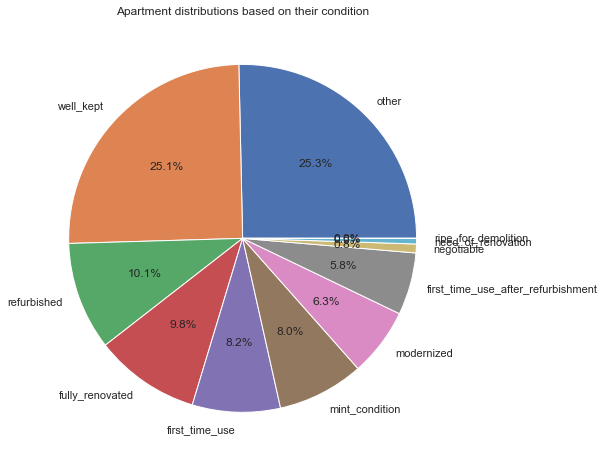

In [5]:
conditions = df['condition'].value_counts().values
lables = df['condition'].value_counts().index
plt.pie(x=conditions, labels=lables, autopct='%1.1f%%')
plt.title('Apartment distributions based on their condition')
plt.show()

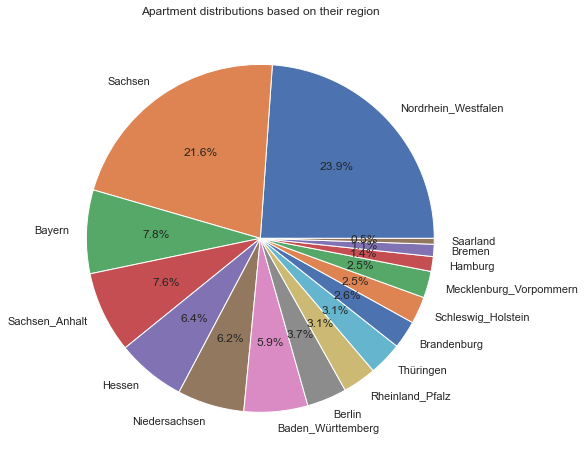

In [6]:
places = df['regio1'].value_counts().values
lables = df['regio1'].value_counts().index
plt.pie(x=places, labels=lables, autopct='%1.1f%%')
plt.title('Apartment distributions based on their region')
plt.show()

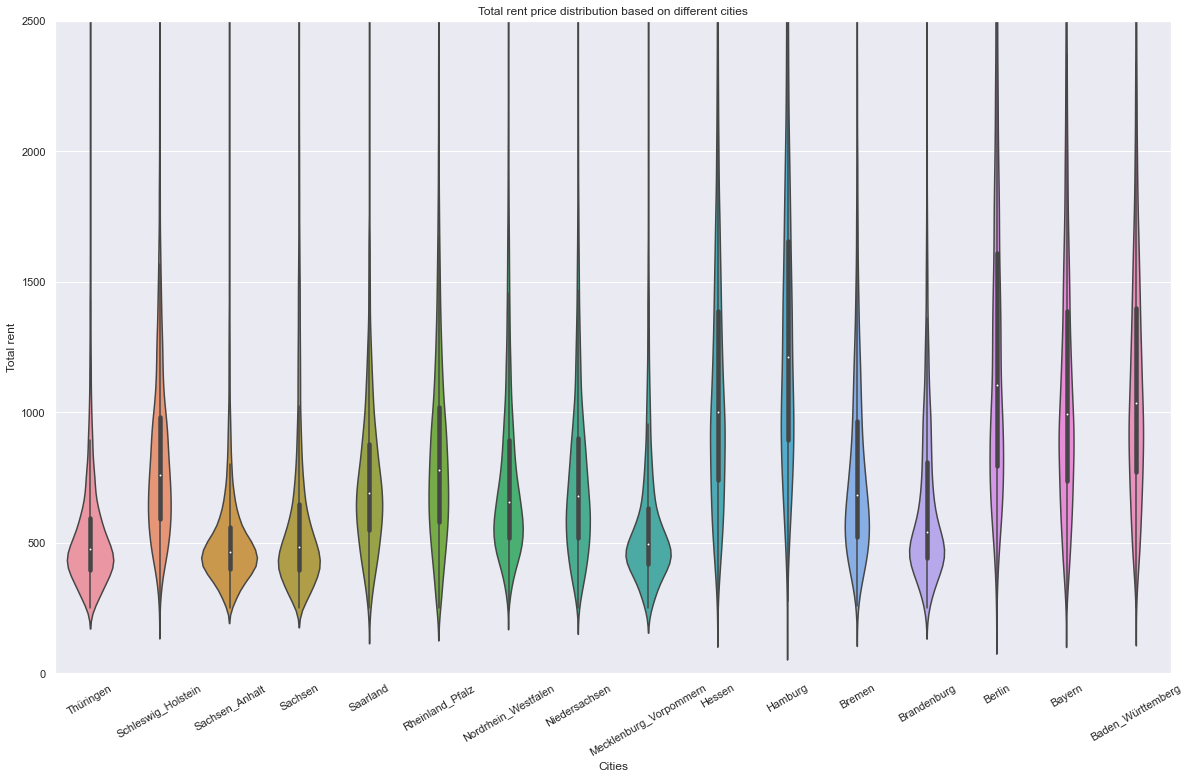

In [21]:
my_order = df.groupby(by=["regio1"])["totalRent"].median().iloc[::-1].index
plt.figure(figsize=(20, 12))
sns.violinplot(y='totalRent', x='regio1', data=df, order=my_order, )
axis = plt.gca()
axis.set_ybound((0, 2500))
axis.set_xlabel("Cities")
axis.set_ylabel("Total rent")
plt.title("Total rent price distribution based on different cities")
plt.xticks(rotation=30)
plt.show()

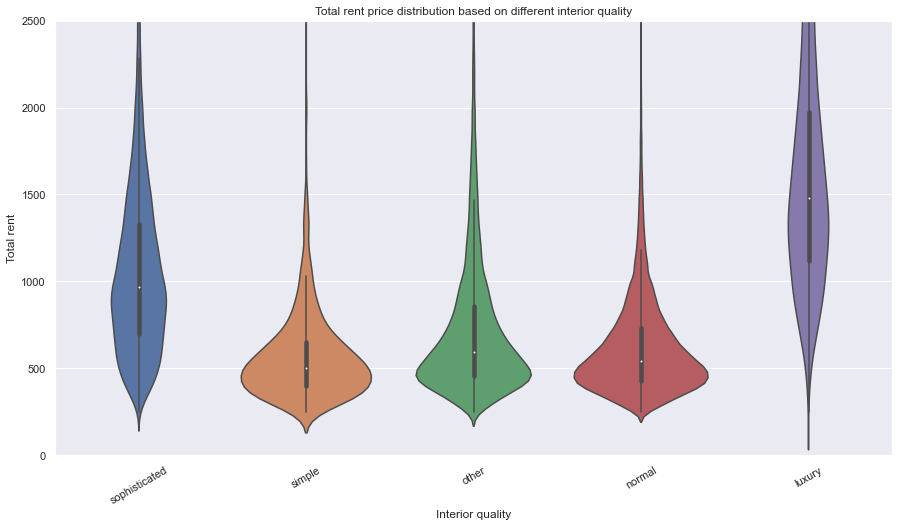

In [26]:
my_order = df.groupby(by=["interiorQual"])["totalRent"].median().iloc[::-1].index
plt.figure(figsize=(15, 8))
sns.violinplot(y='totalRent', x='interiorQual', data=df, order=my_order)
axis = plt.gca()
axis.set_ybound((0, 2500))
axis.set_xlabel("Interior quality")
axis.set_ylabel("Total rent")
plt.title("Total rent price distribution based on different interior quality")
plt.xticks(rotation=30)
plt.show()

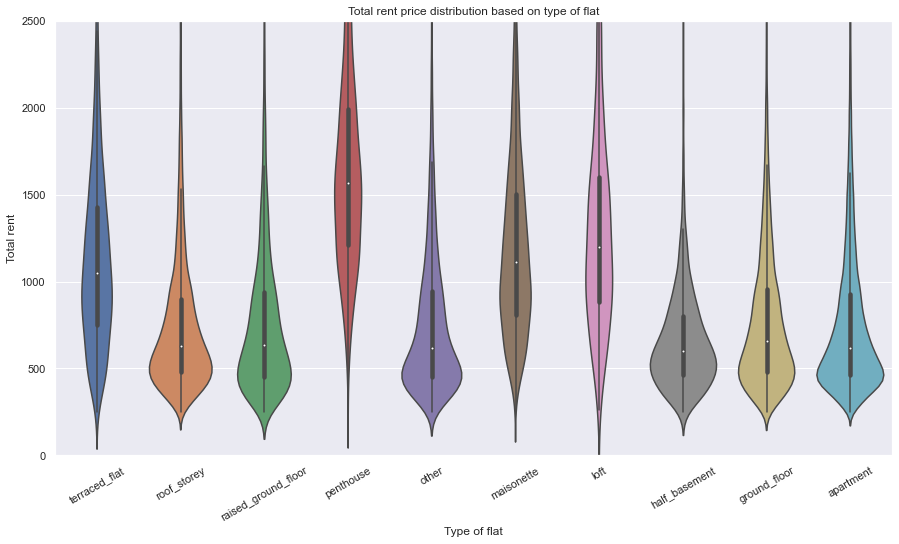

In [32]:
my_order = df.groupby(by=["typeOfFlat"])["totalRent"].median()[::-1].index
plt.figure(figsize=(15, 8))
sns.violinplot(y='totalRent', x='typeOfFlat', data=df, order=my_order)
axis = plt.gca()
axis.set_ybound((0, 2500))
axis.set_xlabel("Type of flat")
axis.set_ylabel("Total rent")
plt.title("Total rent price distribution based on type of flat")
plt.xticks(rotation=30)
plt.show()

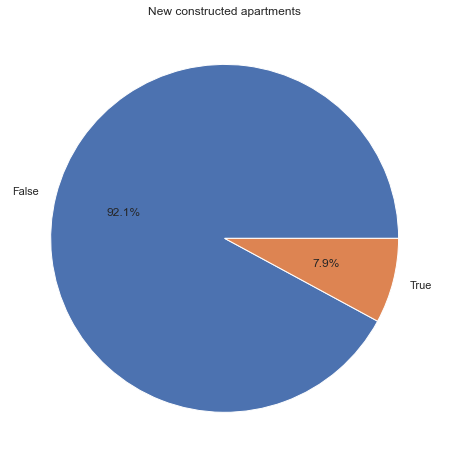

In [27]:
construct = df['newlyConst'].value_counts().values
lables = df['newlyConst'].value_counts().index
plt.pie(x=construct, labels=lables, autopct='%1.1f%%')
plt.title('New constructed apartments')
plt.show()